In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
from annotator_amide_trans import annotator
from pybaselines.polynomial import imodpoly
%matplotlib widget

In [ ]:
wave_no = pd.read_csv("../mdi_optimization/cleaned_csvs/wave_no.csv")
kgy0_sn72 = pd.read_csv("spectral_files/0kGy_sn72.csv")
kgy2_5_sn72 = pd.read_csv("spectral_files/2.5kGy_sn72.csv")
kgy5_sn72 = pd.read_csv("spectral_files/5kGy_sn72.csv")
kgy10_sn72 = pd.read_csv("spectral_files/10kGy_sn72.csv")
kgy25_sn72 = pd.read_csv("spectral_files/25kGy_sn72.csv")
kgy50_sn72 = pd.read_csv("spectral_files/50kGy_sn72.csv")


for df in [kgy0_sn72, kgy2_5_sn72, kgy5_sn72, kgy10_sn72, kgy25_sn72, kgy50_sn72]:
    df["average"] = df.iloc[:, :].mean(axis=1)

# colors = ['blue', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d'] #sequential (red)
# colors = ['black','blue','green', 'red'] #sequential (red) cut!
colors = ["black", "#e41a1c", "#377eb8", "pink", "#984ea3", "#ff7f00"]  # qualitative

dose_names = ["0 kGy", "2.5 kGy", "5 kGy", "10 kGy", "25 kGy", "50 kGy"]
# dose_names = ['0 kGy','5 kGy', '10 kGy', '50 kGy']


def trans(abs):
    data = (10**-abs) * 100
    return data

<h1 style="text-align: center;">Molecular Features of Irradiated Samples</h1>

<h2>Raw Spectra</h2>

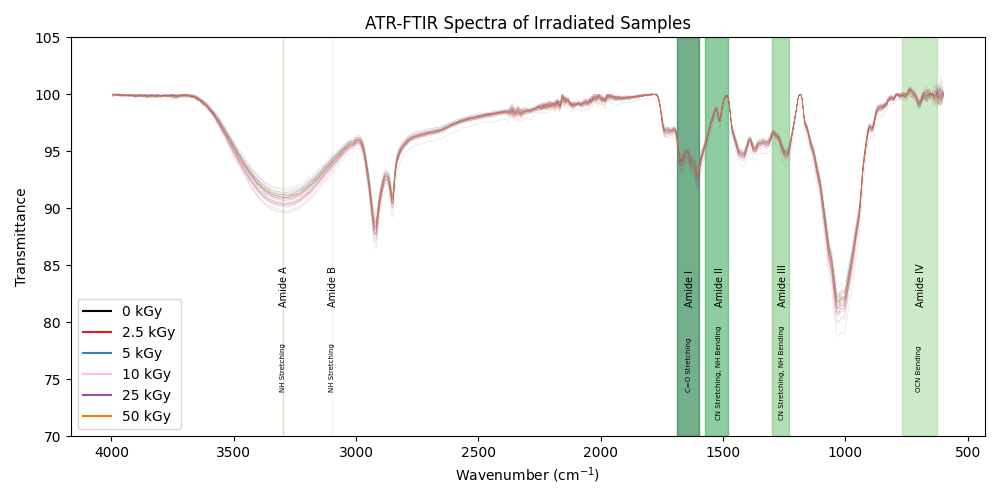

In [ ]:
irrad_comp, axis = plt.subplots(1, 1, figsize=(10, 5))
data = [kgy0_sn72, kgy2_5_sn72, kgy5_sn72, kgy10_sn72, kgy25_sn72, kgy50_sn72]

for color, df in zip(colors, data):
    for sample in df.columns:
        axis.plot(wave_no, trans(df[sample]), color=color, linewidth=0.05)

for color, name in zip(colors, dose_names):
    axis.plot([], [], color=color, label=name)

annotator(axis)
axis.invert_xaxis()
axis.set(
    title="ATR-FTIR Spectra of Irradiated Samples",
    xlabel="Wavenumber (cm$^{-1}$)",
    ylabel="Transmittance",
)

axis.legend()
irrad_comp.tight_layout()

<h2>Averaged Spectra</h2>

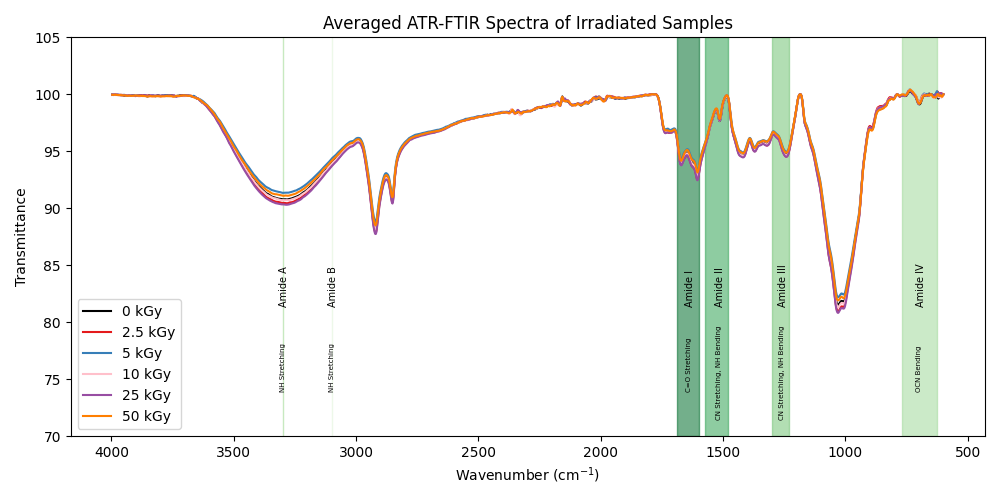

In [ ]:
irrad_ave, axis = plt.subplots(1, 1, figsize=(10, 5))

ave = [trans(df["average"]) for df in data]

for color, name, spec in zip(colors, dose_names, ave):
    axis.plot([], [], color=color, label=name)
    axis.plot(wave_no, spec, color=color, linewidth=1.5)

axis.set(
    title="Averaged ATR-FTIR Spectra of Irradiated Samples",
    xlabel="Wavenumber (cm$^{-1}$)",
    ylabel="Transmittance",
)

annotator(axis)
axis.invert_xaxis()

axis.legend()
irrad_ave.tight_layout()